### skip-gramモデルの学習コード

In [1]:
include("../common/trainer.jl")
include("../common/optimizer.jl")
include("./simple_skip_gram.jl")
include("../common/util.jl")

convert_one_hot (generic function with 1 method)

In [2]:
window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

1000

In [3]:
text = "You say goodbye and I say hello."
corpus, word_to_id, id_to_word = preprocess(text)

([1, 2, 3, 4, 5, 2, 6, 7], Dict{Any,Any}("say" => 2,"goodbye" => 3,"you" => 1,"hello" => 6,"." => 7,"and" => 4,"i" => 5), Dict{Any,Any}(7 => ".",4 => "and",2 => "say",3 => "goodbye",5 => "i",6 => "hello",1 => "you"))

In [4]:
vocab_size = length(word_to_id)
contexts, target = create_contexts_target(corpus, window_size=1)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

6×2×7 Array{Int32,3}:
[:, :, 1] =
 1  0
 0  0
 0  0
 0  0
 0  0
 0  0

[:, :, 2] =
 0  0
 1  0
 0  0
 0  1
 0  0
 1  0

[:, :, 3] =
 0  1
 0  0
 1  0
 0  0
 0  0
 0  0

[:, :, 4] =
 0  0
 0  1
 0  0
 1  0
 0  0
 0  0

[:, :, 5] =
 0  0
 0  0
 0  1
 0  0
 1  0
 0  0

[:, :, 6] =
 0  0
 0  0
 0  0
 0  0
 0  1
 0  0

[:, :, 7] =
 0  0
 0  0
 0  0
 0  0
 0  0
 0  1

In [5]:
model = SimpleSkipGram(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

Trainer(SimpleSkipGram(MatMul([[0.005179825859220669 0.0016975221407225418 … -0.021320741886681694 -0.003464182308251632; -0.005577285474403028 0.01148787130164094 … -0.008621461027015333 -0.006222297235269664; … ; -0.01388046160728034 0.0021602581720637053 … -0.008417137274734556 -2.0574241300436392e-5; 0.007956711357233075 -0.007553723772886174 … 0.013304517204938582 0.01336911645736168]], [[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]], #undef), MatMul([[0.011604077689578099 0.020622765021864015 … 0.002040087545388514 0.011123998626908264; -0.0030907815303946183 -0.006465102618861613 … 0.010557200194257918 -0.0040298181745965405; … ; 0.005309890718946953 0.008175364954481878 … -0.002763359097526929 -0.008103461033482083; 0.009999462912989502 -0.005968949321335792 … -0.00570315339253407 0.005703319084402948]], [[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]], #undef), SoftmaxWithLoss(Any[], Any[], #undef, #undef), S

In [6]:
fit!(trainer, contexts, target, max_epoch=max_epoch, batch_size=batch_size)

| epoch 0 | iter 1 / 2 | loss 11.68
| epoch 0 | iter 2 / 2 | loss 11.67
| epoch 10 | iter 2 / 2 | loss 11.67
| epoch 20 | iter 1 / 2 | loss 11.66
| epoch 20 | iter 2 / 2 | loss 11.64
| epoch 30 | iter 2 / 2 | loss 11.63
| epoch 40 | iter 1 / 2 | loss 11.57
| epoch 40 | iter 2 / 2 | loss 11.51
| epoch 50 | iter 2 / 2 | loss 11.49
| epoch 60 | iter 1 / 2 | loss 11.36
| epoch 60 | iter 2 / 2 | loss 11.32
| epoch 70 | iter 2 / 2 | loss 11.24
| epoch 80 | iter 1 / 2 | loss 11.07
| epoch 80 | iter 2 / 2 | loss 10.94
| epoch 90 | iter 2 / 2 | loss 10.84
| epoch 100 | iter 1 / 2 | loss 10.65
| epoch 100 | iter 2 / 2 | loss 10.73
| epoch 110 | iter 2 / 2 | loss 10.4
| epoch 120 | iter 1 / 2 | loss 10.17
| epoch 120 | iter 2 / 2 | loss 10.11
| epoch 130 | iter 2 / 2 | loss 9.98
| epoch 140 | iter 1 / 2 | loss 9.79
| epoch 140 | iter 2 / 2 | loss 9.66
| epoch 150 | iter 2 / 2 | loss 9.54
| epoch 160 | iter 1 / 2 | loss 9.18
| epoch 160 | iter 2 / 2 | loss 8.66
| epoch 170 | iter 2 / 2 | loss 8.99

In [7]:
using Plots
gr()

Plots.GRBackend()

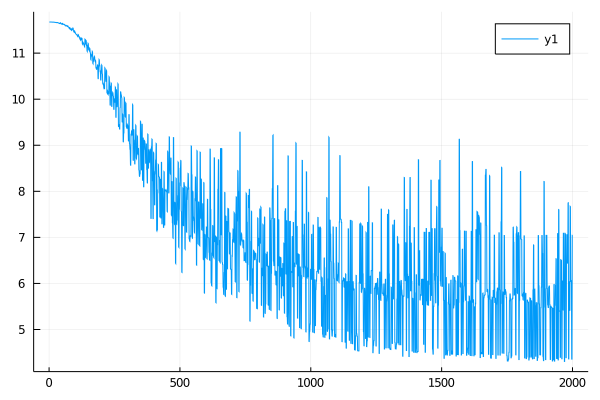

In [8]:
plot(trainer.loss_list)

#### MatMulレイヤの重みを表示

In [9]:
for (word_id, word) = id_to_word
    println("$(word) $(model.word_vecs[word_id, :])")
end

. [0.007956711357233075, -0.007553723772886174, 0.0014784181195537907, 0.013304517204938582, 0.01336911645736168]
and [-0.018887089534075908, -0.002888928301042019, -0.0014782377308695863, 0.007611493240067291, 0.005596340648878084]
say [-0.005577285474403028, 0.01148787130164094, 0.006266940955121013, -0.008621461027015333, -0.006222297235269664]
goodbye [-0.00410010537664558, -0.013561836377366014, 0.01146620130867293, 0.00934929241154978, 0.008574136278850232]
i [0.022794672782016665, 0.01806777438572728, -0.001716273086838445, -0.004856669364685108, 0.006969099945563462]
hello [-0.01388046160728034, 0.0021602581720637053, 0.009656782821434685, -0.008417137274734556, -2.0574241300436392e-5]
you [0.005179825859220669, 0.0016975221407225418, -0.0017652829964765354, -0.021320741886681694, -0.003464182308251632]
